Sean:

* $ t \in \mathbb{N}$ : Posición de una oracion de entrada
* $ \vec{p} \in \mathbb{R}^d $ : Vector de una palabra

* $ f: \mathbb{N} \rightarrow \mathbb{R}^d $ : Función que mapea una palabra a un vector

Definimos la funcion $f$ como:

$$
f^{(i)} (t) = \vec{p} ^ {(i)}  = 
\begin{cases} 
    \sin(\omega_k t) & \text{si } i = 2k \\
    \cos(\omega_k t) & \text{si } i = 2k + 1
\end{cases}
$$

Con $$ \omega_k = \frac{1}{N ^ {2 k /d}} $$

donde $$ N = 10000 $$

Podemos escribir al vector de una palabra entonces como:

$$
\vec{p} = \begin{bmatrix} \sin(\omega_1 t) \\ \cos(\omega_1 t) \\ \sin(\omega_2 t) \\ \cos(\omega_2 t) \\ \vdots \\ \sin(\omega_{d/2} t) \\ \cos(\omega_{d/2} t) \end{bmatrix}
$$

In [37]:
from numpy import exp, log, sin, cos
from numpy import repeat, arange

def positional_encoding(token_position: int, model_dimension: int, scaling_factor: int = 10000):
    indexes = repeat(arange(1, model_dimension / 2 + 1), 2)
    frequencies = exp(-2*indexes * log(scaling_factor) / model_dimension)
    positional_embedding = [
        sin(frequency * token_position) if index % 2 == 1 else 
        cos(frequency * token_position)
        for index, frequency in enumerate(frequencies, start=1)
    ]
    return positional_embedding

/tmp/ipykernel_2336/642360709.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()


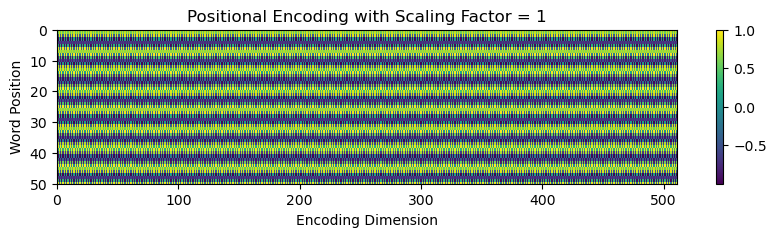

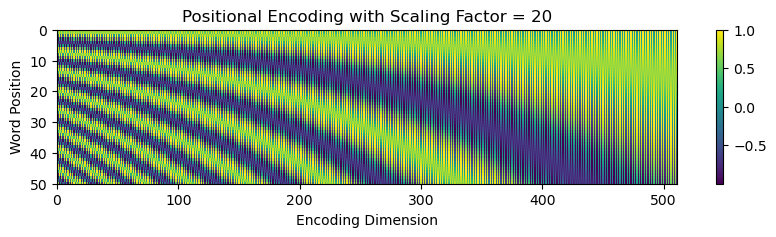

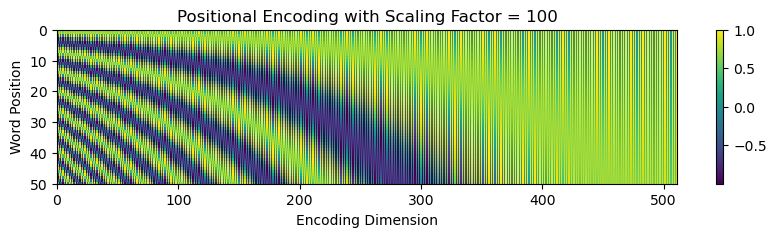

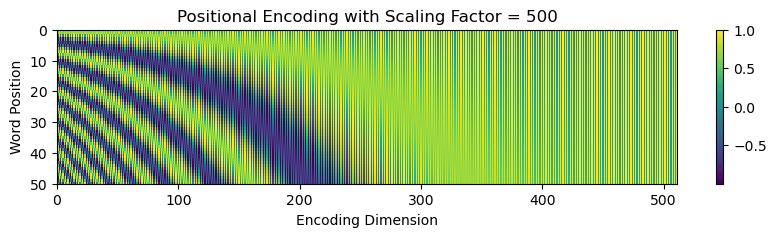

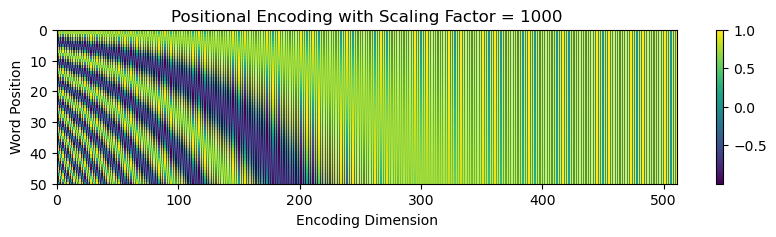

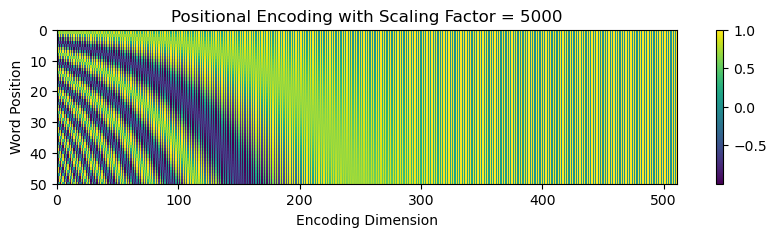

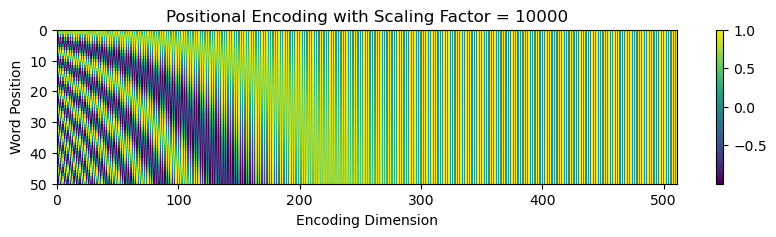

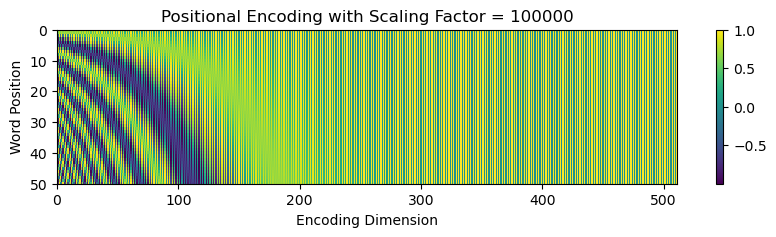

In [38]:
from numpy import meshgrid, array
from matplotlib.pyplot import figure
from matplotlib.pyplot import Axes

def plot_positonal_encoding(ax: Axes, scaling_factor: int = 10000):
    token_positions = arange(50, -1, -1)
    encoding_dimension = 512

    x = arange(encoding_dimension) 
    y = token_positions
    z = array([positional_encoding(token_position, encoding_dimension, scaling_factor) for token_position in token_positions])

    image = ax.pcolormesh(x, y, z, cmap='viridis')

    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.max(), y.min())

    ax.set_xlabel('Encoding Dimension')
    ax.set_ylabel('Word Position')
    ax.set_title(f'Positional Encoding with Scaling Factor = {scaling_factor}')

    return image


for scaling_factor in [1, 20, 100, 500, 1000, 5000, 10000, 100000]:
    plot = figure(figsize=(10, 2))
    ax = plot.add_subplot()
    image = plot_positonal_encoding(ax, scaling_factor)
    plot.colorbar(image, ax=ax, orientation='vertical')
    plot.show()

El proposito de la codificacion es proporcionar una representación vectorial única que codifica la posición de cada token, significa que cada fila representa una posición y cuanto más lejos estén dos posiciones, mayor será la distancia entre ese vector.

In [34]:
from torch import Tensor 
from torch.nn import Module

class PositionalEncoder(Module):
    def __init__(self, token_limit: int, model_dimension: int, scaling_factor: int = 10000):
        super().__init__()
        self.positional_encoding_table = Tensor([
            positional_encoding(token_position, model_dimension, scaling_factor) for token_position in range(token_limit)
        ])

    def forward(self, input: Tensor) -> Tensor:
        return input + self.positional_encoding_table[:input.size(1)]

torch.Size([50, 512])
